## Problem Statement

Rohlik Group, a leading European e-grocery innovator, is revolutionising the food retail industry. We operate across 11 warehouses in Czech Republic, Germany, Austria, Hungary, and Romania.

Our challenge focuses on predicting the number of orders (grocery deliveries) at selected warehouses for the next 60 days.

## import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09


In [4]:
test_data.head()

,warehouse,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id
0,Prague_1,2024-03-16,NaN,0,0,0,0,Prague_1_2024-03-16
1,Prague_1,2024-03-17,NaN,0,0,0,0,Prague_1_2024-03-17
2,Prague_1,2024-03-18,NaN,0,0,0,0,Prague_1_2024-03-18
3,Prague_1,2024-03-19,NaN,0,0,0,0,Prague_1_2024-03-19
4,Prague_1,2024-03-20,NaN,0,0,0,0,Prague_1_2024-03-20


In [5]:
train_data.shape

(7340, 18)

In [6]:
test_data.shape

(397, 8)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7340 entries, 0 to 7339
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   warehouse               7340 non-null   object 
 1   date                    7340 non-null   object 
 2   orders                  7340 non-null   float64
 3   holiday_name            218 non-null    object 
 4   holiday                 7340 non-null   int64  
 5   shutdown                7340 non-null   int64  
 6   mini_shutdown           7340 non-null   int64  
 7   shops_closed            7340 non-null   int64  
 8   winter_school_holidays  7340 non-null   int64  
 9   school_holidays         7340 non-null   int64  
 10  blackout                7340 non-null   int64  
 11  mov_change              7340 non-null   float64
 12  frankfurt_shutdown      7340 non-null   int64  
 13  precipitation           7070 non-null   float64
 14  snow                    7070 non-null   

In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
orders,7340.0,5535.443869,2182.680279,790.0,4434.0,5370.0,7009.25,18139.00
holiday,7340.0,0.027248,0.162816,0.0,0.0,0.0,0.00,1.00
shutdown,7340.0,0.000136,0.011672,0.0,0.0,0.0,0.00,1.00
mini_shutdown,7340.0,0.000545,0.023340,0.0,0.0,0.0,0.00,1.00
shops_closed,7340.0,0.010899,0.103836,0.0,0.0,0.0,0.00,1.00
winter_school_holidays,7340.0,0.029973,0.170524,0.0,0.0,0.0,0.00,1.00
school_holidays,7340.0,0.007084,0.083876,0.0,0.0,0.0,0.00,1.00
blackout,7340.0,0.000954,0.030869,0.0,0.0,0.0,0.00,1.00
mov_change,7340.0,0.221499,0.410293,0.0,0.0,0.0,0.00,1.00
frankfurt_shutdown,7340.0,0.000272,0.016506,0.0,0.0,0.0,0.00,1.00


In [10]:
train_data.duplicated().sum()

0

In [9]:
train_data.isnull().sum()

warehouse                    0
date                         0
orders                       0
holiday_name              7122
holiday                      0
shutdown                     0
mini_shutdown                0
shops_closed                 0
winter_school_holidays       0
school_holidays              0
blackout                     0
mov_change                   0
frankfurt_shutdown           0
precipitation              270
snow                       270
user_activity_1              0
user_activity_2              0
id                           0
dtype: int64

In [11]:
# Convert the 'date' column to datetime format for easier date manipulation
train_data['date'] = pd.to_datetime(train_data['date'])

# Extract year, month, and week number from the date for further analysis
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['week_number'] = train_data['date'].dt.isocalendar().week
train_data['day'] = train_data['date'].dt.day

# Create binary columns for each day of the week to capture weekly patterns
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, day in enumerate(days):
    train_data[day] = (train_data['date'].dt.dayofweek == i).astype(int)

# Create the 'is_weekend' column
train_data['is_weekend'] = train_data['Saturday'] + train_data['Sunday']

# Create the 'month_start_end' column
train_data['month_start_end'] = ((train_data['date'].dt.is_month_start) | (train_data['date'].dt.is_month_end)).astype(int)

# Display the first few rows of the train_data to confirm the new columns
print(train_data.head())


  warehouse       date  orders holiday_name  holiday  shutdown  mini_shutdown  \
0  Prague_1 2020-12-05  6895.0          NaN        0         0              0   
1  Prague_1 2020-12-06  6584.0          NaN        0         0              0   
2  Prague_1 2020-12-07  7030.0          NaN        0         0              0   
3  Prague_1 2020-12-08  6550.0          NaN        0         0              0   
4  Prague_1 2020-12-09  6910.0          NaN        0         0              0   

   shops_closed  winter_school_holidays  school_holidays  ...  day  Monday  \
0             0                       0                0  ...    5       0   
1             0                       0                0  ...    6       0   
2             0                       0                0  ...    7       1   
3             0                       0                0  ...    8       0   
4             0                       0                0  ...    9       0   

   Tuesday  Wednesday  Thursday  Friday  Sat

## Pre-processing

In [12]:
# Drop columns that are not available in the test train_dataset to prevent errors in model training
columns_to_drop = ['shutdown', 'mini_shutdown', 'blackout', 'frankfurt_shutdown','user_activity_1','user_activity_2']
train_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Group the train_data by date, week number, year, warehouse, and month and sum up the other columns
grouped_train_data = train_data.groupby(['date', 'week_number', 'year', 'warehouse', 'month','day']).sum().reset_index()

# Save the cleaned and aggregated train_data to a new CSV file
grouped_train_data.to_csv('cleaned_train.csv', index=False)

# Load the cleaned train_dataset
train_data_path = "cleaned_train.csv"
train_data = pd.read_csv(train_data_path)
train_data['date'] = pd.to_datetime(train_data['date'])
train_data.sort_values('date', inplace=True)



In [15]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'holiday_name' column to convert categorical text train_data into model-usable numeric train_data
encoder_holiday = LabelEncoder()
train_data['holiday_name_encoded'] = encoder_holiday.fit_transform(train_data['holiday_name'])

train_data['shopping_day'] = np.where(
    # Black Friday (assuming it's always the fourth Friday of November)
    ((train_data['day'] >= 22) & (train_data['day'] <= 28) & (train_data['month'] == 11) & (train_data['week_number'] == 4)) |
    
    # Cyber Monday (assuming it's always the fourth Monday of November)
    ((train_data['day'] >= 22) & (train_data['day'] <= 28) & (train_data['month'] == 11) & (train_data['week_number'] == 0)) |
    
    # Valentine's Day
    ((train_data['day'] == 14) & (train_data['month'] == 2)) |
    
    # Singles' Day
    ((train_data['day'] == 11) & (train_data['month'] == 11)) |
    
    # Christmas Day and Christmas Eve
    ((train_data['day'] == 24) & (train_data['month'] == 12)) |
    ((train_data['day'] == 25) & (train_data['month'] == 12)) |
    
    # New Year's Eve (for January sales)
    ((train_data['day'] == 31) & (train_data['month'] == 12)) |
    
    # New Year's Day (for January sales)
    ((train_data['day'] == 1) & (train_data['month'] == 1)),
    
    1, 0
)


In [18]:
# Initialize storage for models and seasonal dataframes specific to each warehouse
models = {}
seasonal_dfs = {}
snow_dfs = {}
precipitation_dfs = {}
move_dfs = {}

# Set up the grid search parameters for the XGBoost model
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300,500],
    'learning_rate': [0.01, 0.1, 0.2]
}


Warehouse: Brno_1
(1193, 27)


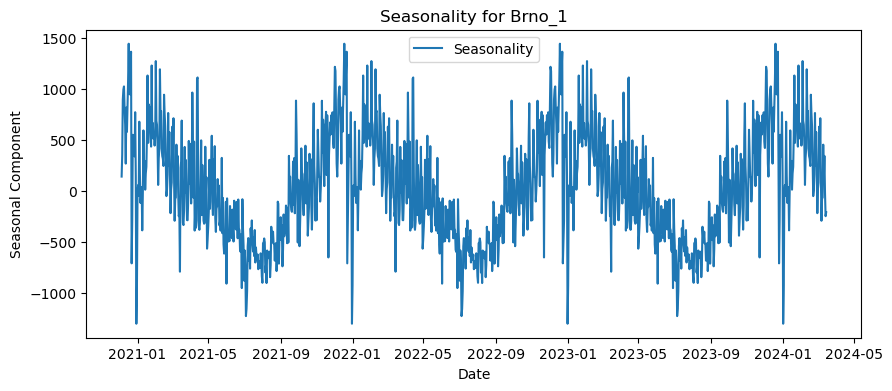

Best Params for Brno_1: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
MAPE for Brno_1: 0.02267625029106347


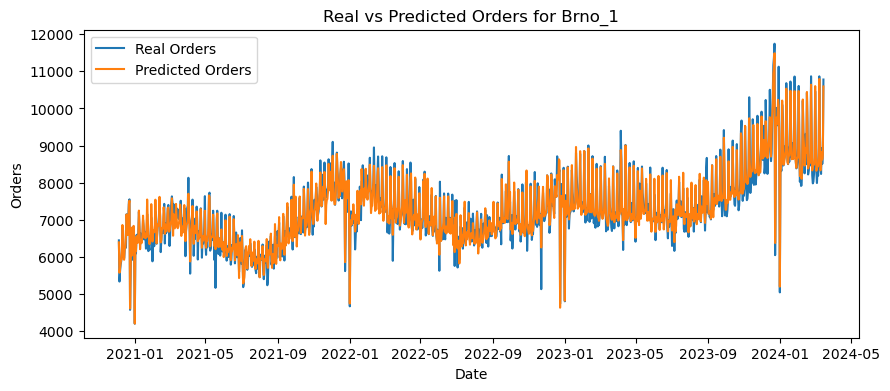

Warehouse: Budapest_1
(1154, 27)


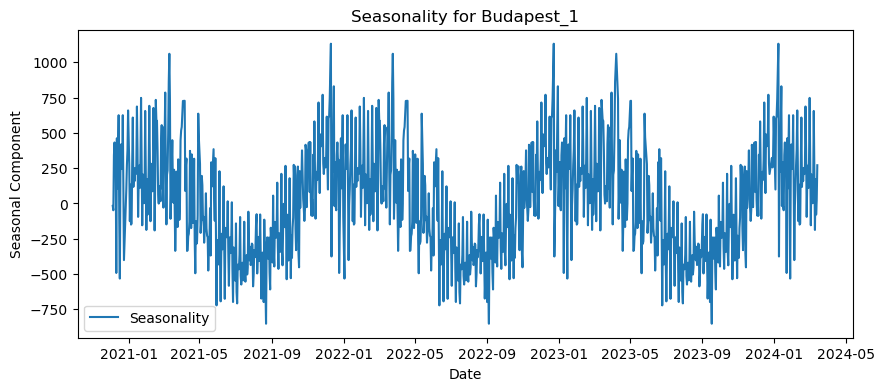

Best Params for Budapest_1: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
MAPE for Budapest_1: 0.01968052970368714


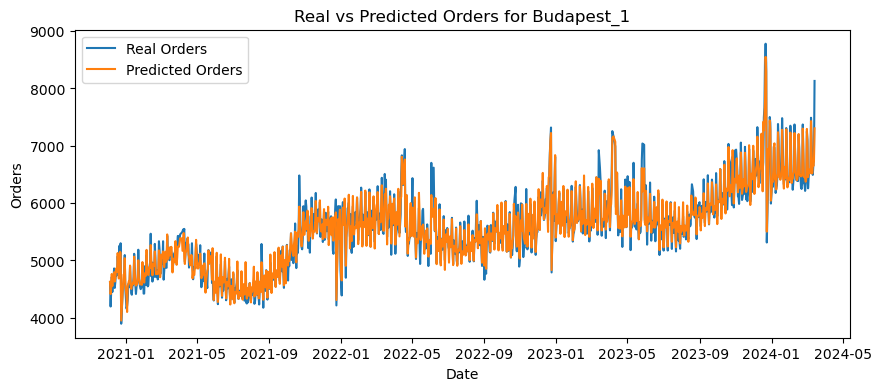

Warehouse: Prague_1
(1193, 27)


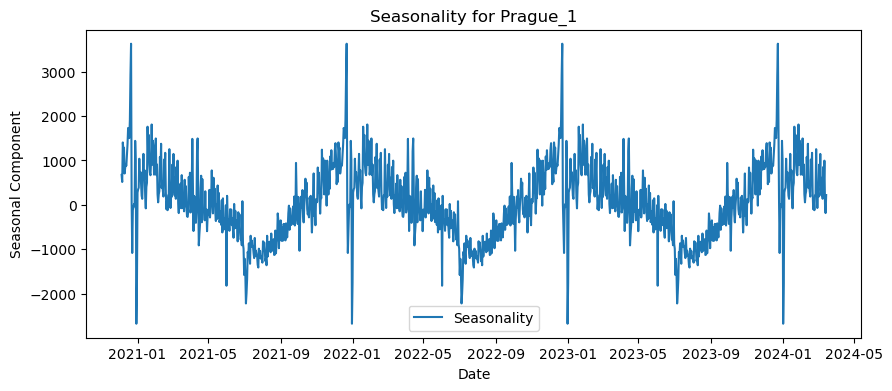

Best Params for Prague_1: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
MAPE for Prague_1: 0.021428789449564296


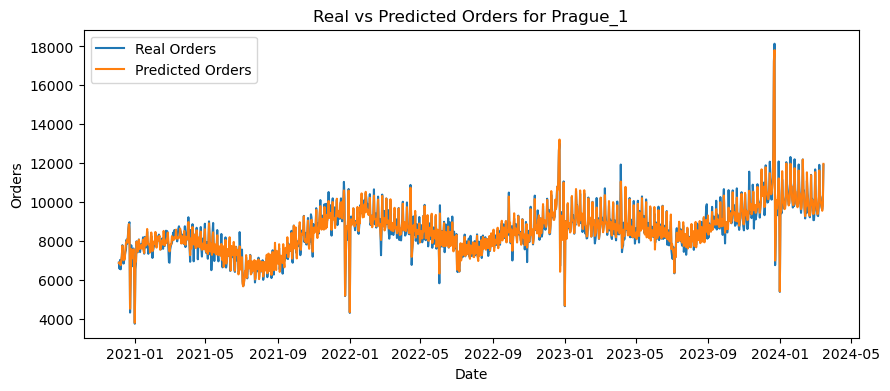

Warehouse: Prague_2
(1193, 27)


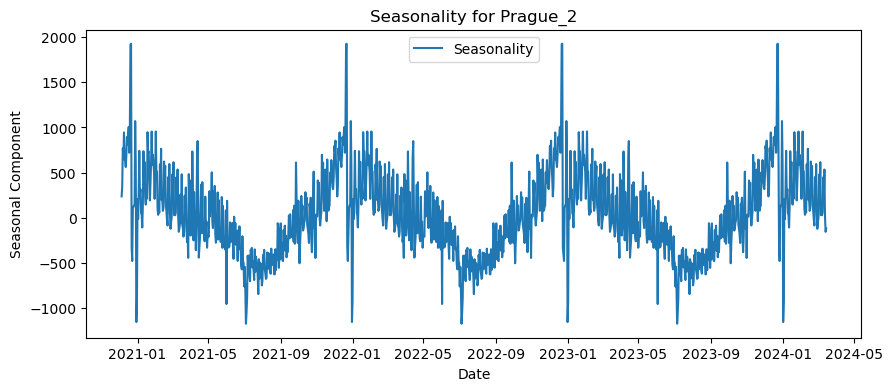

Best Params for Prague_2: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
MAPE for Prague_2: 0.025326986717836206


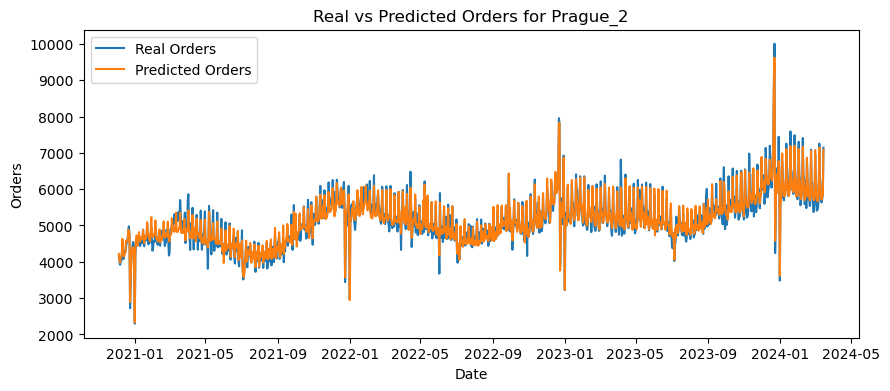

Warehouse: Prague_3
(1193, 27)


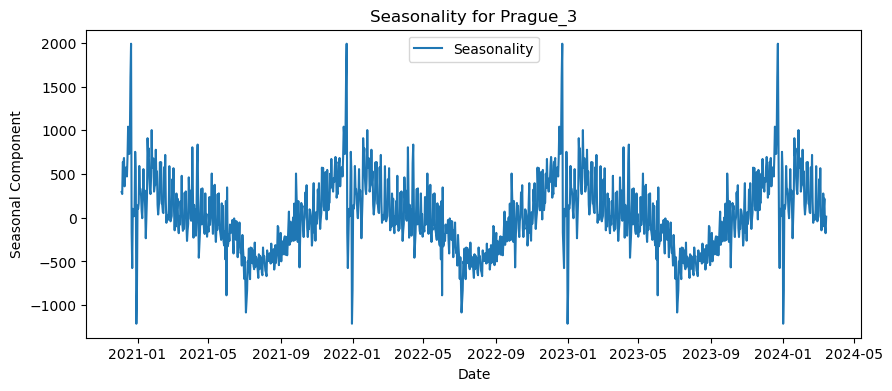

Best Params for Prague_3: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
MAPE for Prague_3: 0.02339322862779361


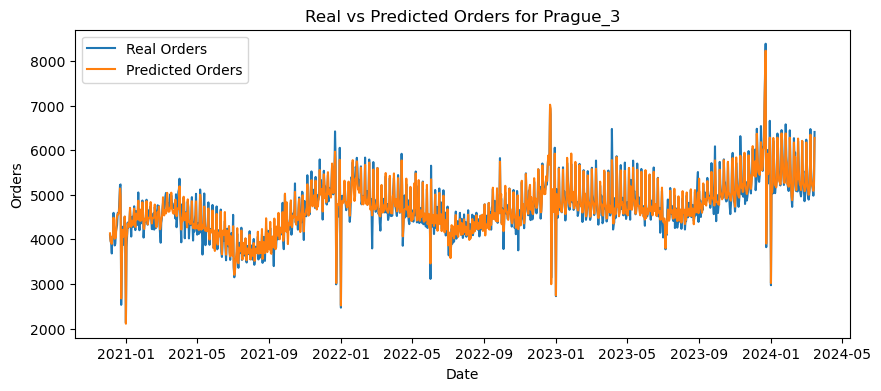

Warehouse: Munich_1
(785, 27)


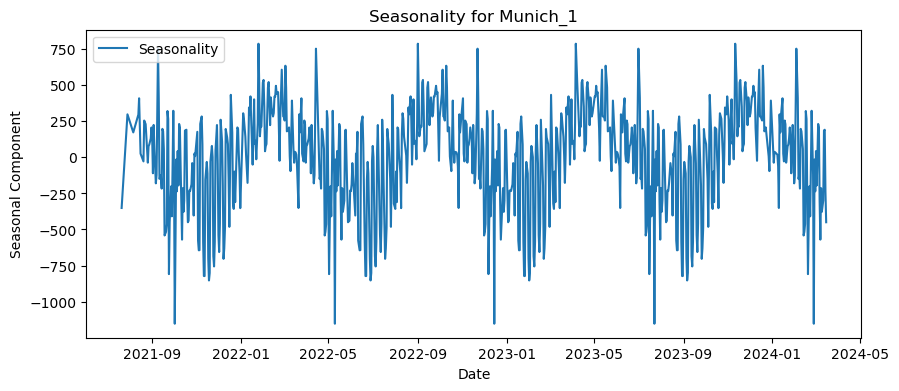

Best Params for Munich_1: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
MAPE for Munich_1: 0.03651366777383396


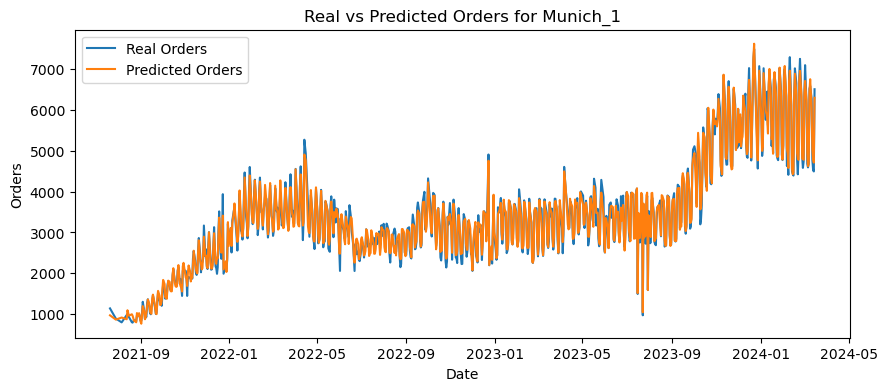

Warehouse: Frankfurt_1
(629, 27)


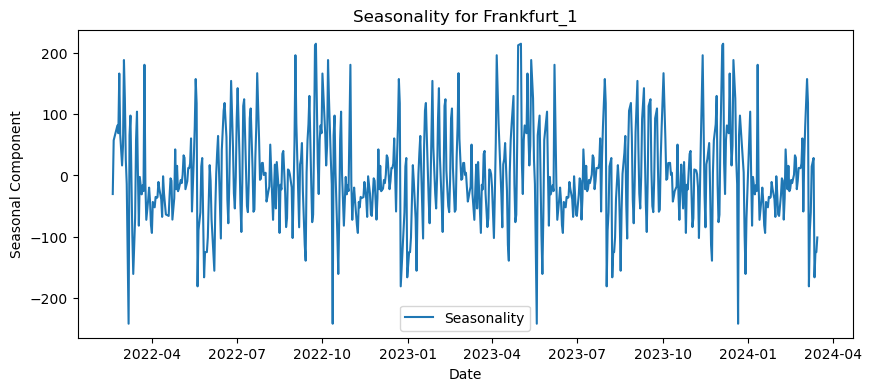

Best Params for Frankfurt_1: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
MAPE for Frankfurt_1: 0.04366796811747724


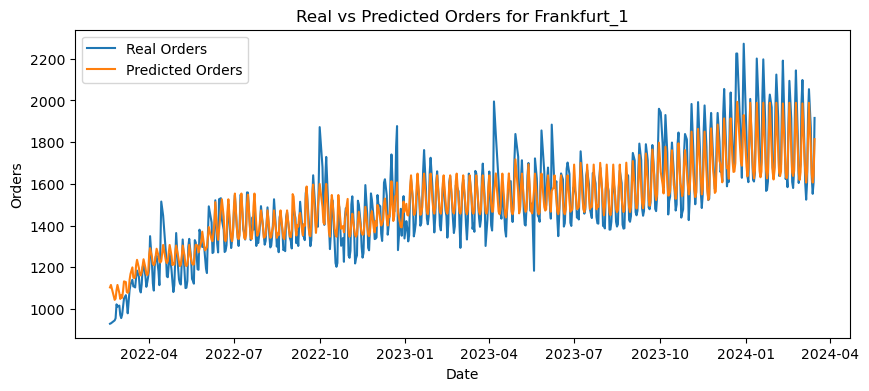

In [27]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Process each warehouse individually
for warehouse in train_data['warehouse'].unique():
    print(f'Warehouse: {warehouse}')
    warehouse_train_data = train_data[train_data['warehouse'] == warehouse]
    warehouse_train_data = warehouse_train_data.sort_values('date',ascending = True)
    print(warehouse_train_data.shape)
    
    # Seasonality extraction using seasonal_decompose from statsmodels for time series analysis
    if warehouse_train_data.shape[0] > 2 * 365 and (warehouse != 'Munich_1' and warehouse!='Frankfurt_1'):
        result = seasonal_decompose(warehouse_train_data['orders'], model='additive', period=365)
    elif warehouse_train_data.shape[0] < 2 * 365 and (warehouse != 'Munich_1' and warehouse!='Frankfurt_1'):
        result = seasonal_decompose(warehouse_train_data['orders'], model='additive', period= 365//2)
    elif warehouse == 'Munich_1':
         result = seasonal_decompose(warehouse_train_data['orders'], model='additive', period= 365//2)#38
    elif warehouse == 'Frankfurt_1':
         result = seasonal_decompose(warehouse_train_data['orders'], model='additive', period= 365//2) #44
        
    warehouse_train_data['seasonality'] = result.seasonal

    # Average seasonality by week number
    seasonal_df = warehouse_train_data.groupby(['warehouse', 'week_number'])['seasonality'].mean().reset_index()
    seasonal_dfs[f'season_{warehouse}'] = seasonal_df
    snow_dfs[warehouse] = warehouse_train_data.groupby(['warehouse', 'week_number'])['snow'].mean().reset_index()
    precipitation_dfs[warehouse] = warehouse_train_data.groupby(['warehouse', 'week_number'])['precipitation'].mean().reset_index()
    move_dfs[warehouse] = warehouse_train_data.groupby(['warehouse', 'week_number'])['mov_change'].mean().reset_index()
    
    # Plot the extracted seasonality to visualize patterns
    plt.figure(figsize=(10, 4))
    plt.plot(warehouse_train_data['date'], warehouse_train_data['seasonality'], label='Seasonality')
    plt.title(f'c for {warehouse}')
    plt.xlabel('Date')
    plt.ylabel('Seasonal Component')
    plt.legend()
    plt.show()
    
    # Prepare train_data for model training
    warehouse_train_data = warehouse_train_data.sort_values(['date'], ascending=True)
    X = warehouse_train_data.drop(columns=['date', 'orders', 'warehouse', 'holiday_name', 'id'])  # Assuming these are the features to use
    y = warehouse_train_data['orders']

    # Initialize time series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    # Configure and train XGBoost model with grid search
    model = XGBRegressor(objective='reg:squarederror', random_state=SEED)
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=tscv)
    grid_search.fit(X, y)
    
    # Save the best model and report its performance
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X)
    mape = mean_absolute_percentage_error(y, predictions)
    models[warehouse] = best_model
    
    print(f"Best Params for {warehouse}: {grid_search.best_params_}")
    print(f"MAPE for {warehouse}: {mape}")

    # Plot real vs predicted values
    plt.figure(figsize=(10, 4))
    plt.plot(warehouse_train_data['date'], y, label='Real Orders')
    plt.plot(warehouse_train_data['date'], predictions, label='Predicted Orders')
    plt.title(f'Real vs Predicted Orders for {warehouse}')
    plt.xlabel('Date')
    plt.ylabel('Orders')
    plt.legend()
    plt.show()
    
   
    

In [29]:
# Load the test dataset
test = pd.read_csv('test.csv')

# Preserve the original columns for reference
original_columns = test.columns

# Convert the 'date' column to datetime type to facilitate date manipulation
test['date'] = pd.to_datetime(test['date'])

# Extract the year, month, and week number from the 'date' column
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['week_number'] = test['date'].dt.isocalendar().week
test['day'] = test['date'].dt.day

# Create binary columns for each day of the week to identify the day
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, day in enumerate(days):
    test[day] = (test['date'].dt.dayofweek == i).astype(int)

# Create the 'is_weekend' column
test['is_weekend'] = test['Saturday'] + test['Sunday']

# Create the 'month_start_end' column
test['month_start_end'] = ((test['date'].dt.is_month_start) | (test['date'].dt.is_month_end)).astype(int)

test['shopping_day'] = np.where(
    # Black Friday (assuming it's always the fourth Friday of November)
    ((test['day'] >= 22) & (test['day'] <= 28) & (test['month'] == 11) & (test['week_number'] == 4)) |
    
    # Cyber Monday (assuming it's always the fourth Monday of November)
    ((test['day'] >= 22) & (test['day'] <= 28) & (test['month'] == 11) & (test['week_number'] == 0)) |
    
    # Valentine's Day
    ((test['day'] == 14) & (test['month'] == 2)) |
    
    # Singles' Day
    ((test['day'] == 11) & (test['month'] == 11)) |
    
    # Christmas Day and Christmas Eve
    ((test['day'] == 24) & (test['month'] == 12)) |
    ((test['day'] == 25) & (test['month'] == 12)) |
    
    # New Year's Eve (for January sales)
    ((test['day'] == 31) & (test['month'] == 12)) |
    
    # New Year's Day (for January sales)
    ((test['day'] == 1) & (test['month'] == 1)),
    
    1, 0
)

# Print the first few rows of the test DataFrame to verify the new columns
print(test.head())

# Initialize an empty list to collect the DataFrames for each warehouse
combined_df = []

# Iterate over each warehouse
for warehouse in test['warehouse'].unique():
    print(f'Warehouse: {warehouse}')
    # Filter test data for the current warehouse
    test_warehouse = test[test['warehouse'] == warehouse]
    # Retrieve the seasonal data frame specific to the current warehouse
    seasonal_df = seasonal_dfs[f'season_{warehouse}']
    
    snow_df = snow_dfs[warehouse]
    
    precipitation_df = precipitation_dfs[warehouse]
    
    move_df = move_dfs[warehouse]
    # Display the shape of the filtered DataFrame
    print(test_warehouse.shape)
    # Merge the seasonal data into the test warehouse DataFrame on 'week_number'
    test_warehouse = test_warehouse.merge(seasonal_df, on=['week_number','warehouse'], how='left')
    test_warehouse = test_warehouse.merge(snow_df,on=['week_number','warehouse'],how='left')
    test_warehouse = test_warehouse.merge(precipitation_df,on=['week_number','warehouse'],how='left')
    test_warehouse = test_warehouse.merge(move_df,on=['week_number','warehouse'],how = 'left')
    # Fill missing values in 'holiday_name' column with '0'
    test_warehouse['holiday_name'] = test_warehouse['holiday_name'].fillna('0')
    test_warehouse.fillna(0,inplace = True)

    # Encode the 'holiday_name' using the previously fitted LabelEncoder
    test_warehouse['holiday_name_encoded'] = encoder_holiday.transform(test_warehouse['holiday_name'])
    
    test_warehouse = test_warehouse.sort_values(['date'],ascending = True)
    # Select columns for the test set that match the training set's features
    X_test = test_warehouse[X.columns]
    # Retrieve the model for the current warehouse
    model = models[warehouse]
    # Predict the orders using the model
    test_warehouse['orders'] = model.predict(X_test)
    # Append the resulting DataFrame to the list
    combined_df.append(test_warehouse)

# Concatenate all DataFrames in the list into a single DataFrame
combined_results = pd.concat(combined_df, ignore_index=True)


  warehouse       date holiday_name  holiday  shops_closed  \
0  Prague_1 2024-03-16          NaN        0             0   
1  Prague_1 2024-03-17          NaN        0             0   
2  Prague_1 2024-03-18          NaN        0             0   
3  Prague_1 2024-03-19          NaN        0             0   
4  Prague_1 2024-03-20          NaN        0             0   

   winter_school_holidays  school_holidays                   id  year  month  \
0                       0                0  Prague_1_2024-03-16  2024      3   
1                       0                0  Prague_1_2024-03-17  2024      3   
2                       0                0  Prague_1_2024-03-18  2024      3   
3                       0                0  Prague_1_2024-03-19  2024      3   
4                       0                0  Prague_1_2024-03-20  2024      3   

   ...  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
0  ...       0        0          0         0       0         1       0  

In [30]:
combined_results[['id','orders']].to_csv('prediction1.csv',index=False)